# David Gamaliel Arcos Bravo
# Fransisco Alfredo Castrellon Carrillo

In [104]:
from gc import collect
import numpy as np
import matplotlib.pyplot as plt
import cv2

from collections import defaultdict
from copy import deepcopy

18
15
13
9
9
7
6
13
16
3


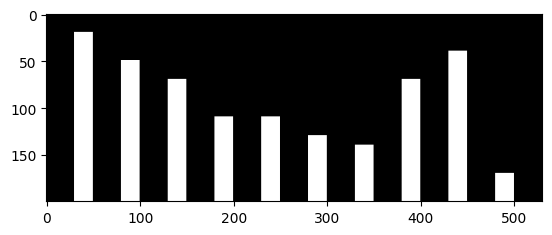

In [105]:
X = 10
N = 20
M = 30
K = 10
MAX_HEIGHT = 20
kernel = np.ones((X,N),np.uint64)
img = np.zeros((X*MAX_HEIGHT, (M+N)*K+M), dtype=np.uint64)

for i in range(K):
    h = np.random.randint(1, MAX_HEIGHT)*X
    img[h:, (M+N)*i+M:(M+N)*i+M+N] = 1
    print(MAX_HEIGHT - h//X)

plt.imshow(img, cmap='gray')

In [116]:
from functools import total_ordering


total = 0
total_vec = []
for i in range(K):
    cont = 0
    for j in range(MAX_HEIGHT):
        cont += np.sum(img[:, (M+N)*i+M:(M+N)*i+M+N])
    print(cont//N//X//MAX_HEIGHT)
    total += cont//N//X//MAX_HEIGHT
    total_vec.append(cont//N//X//MAX_HEIGHT)
print(total)
print(total_vec)

18.0
15.0
13.0
9.0
9.0
7.0
6.0
13.0
16.0
3.0
109.0
[18.0, 15.0, 13.0, 9.0, 9.0, 7.0, 6.0, 13.0, 16.0, 3.0]


109
[18.0, 15.0, 13.0, 9.0, 9.0, 7.0, 6.0, 13.0, 16.0, 3.0]
[18, 15, 13, 9, 9, 7, 6, 13, 16, 3]


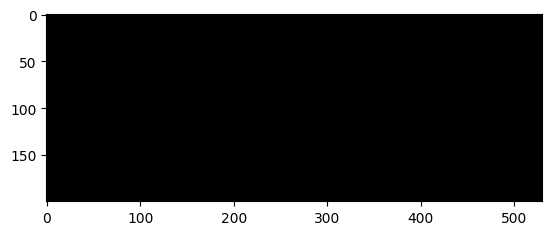

In [123]:
imgcpy = deepcopy(img) # .copy()
counts = defaultdict(int)
w, h = imgcpy.shape

wArr = [0, N-1]
hArr = [0, X-1]
cnt = 0
executed = True
cont = [0 for i in range(K)]
while executed:
    executed = False
    for i in reversed(range(len(imgcpy))):
        for j in range(len(imgcpy[i])):
            if imgcpy[i,j] == 1 and 0 < i <= (X*MAX_HEIGHT)-X and 0 < j <= (M+N)*K+M - (N+M):
                if imgcpy[i-1, j-1] == 0 and imgcpy[i+X-1, j+N-1] == 1: #Entro
                    # imgcpy[i:i+X-1, j:j+N-1] = 0
                    imgcpy[i:i+X, j:j+N] = 0
                    cont[j//(M+N)] += 1
                    cnt += 1
                    executed = True
print(cnt)
print(total_vec)
print(cont)
plt.imshow(imgcpy, cmap='gray')